First, the $R_x(2t)$ operation can be represented by the matrix
\begin{equation*}
    R_x(2t) = 
    \begin{bmatrix}
        \cos t & -i\sin t \\
        -i\sin t & \cos t
    \end{bmatrix}.
\end{equation*}
Let the application of this matrix on the states $|0\rangle$ and $|+\rangle$ be represented by $|\psi_0\rangle$ and $|\psi_+\rangle$ such that
\begin{align*}
    |\psi_0\rangle &=
    \begin{bmatrix}
        \cos t \\
        -i\sin t
    \end{bmatrix} \\
    |\psi_+\rangle &=
    \frac{1}{\sqrt{2}}
    \begin{bmatrix}
        \cos t - i\sin t \\
        \cos t - i\sin t
    \end{bmatrix}
\end{align*}
1. Expectation values for $Z$ basis

\begin{align*}
    \langle \psi_0 | Z | \psi_0 \rangle &= 
    \begin{bmatrix}
        \cos t & i\sin t
    \end{bmatrix}
    \begin{bmatrix}
        1 & 0 \\
        0 & -1
    \end{bmatrix}
    \begin{bmatrix}
        \cos t \\
        -i\sin t
    \end{bmatrix} \\ 
    &= \cos^2 t - \sin^2 t = \boxed{\cos(2t)} \\

    \langle \psi_+ | Z | \psi_+ \rangle &=
    \frac{1}{2}
    \begin{bmatrix}
        \cos t + i\sin t & \cos t + i\sin t
    \end{bmatrix}
    \begin{bmatrix}
        1 & 0 \\
        0 & -1
    \end{bmatrix}
    \begin{bmatrix}
        \cos t - i\sin t \\
        \cos t - i\sin t
    \end{bmatrix} \\
    &= \frac{1}{2}(\cos^2 t + \sin^2 t - \cos^2 t - \sin^2 t) = \boxed{0}
\end{align*}

2. Expectation values for $X$ basis

\begin{align*}
    \langle \psi_0 | X | \psi_0 \rangle &=
    \begin{bmatrix}
        \cos t & i\sin t
    \end{bmatrix}
    \begin{bmatrix}
        0 & 1 \\
        1 & 0
    \end{bmatrix}
    \begin{bmatrix}
        \cos t \\
        -i\sin t
    \end{bmatrix} \\ 
    &= -i\cos t\sin t + i\cos t\sin t = \boxed{0} \\

    \langle \psi_+ | X | \psi_+ \rangle &=
    \frac{1}{2}
    \begin{bmatrix}
        \cos t + i\sin t & \cos t + i\sin t
    \end{bmatrix}
    \begin{bmatrix}
        0 & 1 \\
        1 & 0
    \end{bmatrix}
    \begin{bmatrix}
        \cos t - i\sin t \\
        \cos t - i\sin t
    \end{bmatrix} \\ 
    &= \frac12(\cos^2t + \sin^2t + \cos^2t + \sin^2t) = \boxed{1}
\end{align*}

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ev(start, axis, t, shots=1000):
    qc = QuantumCircuit(1, 1)

    if start == '0':
        pass
    elif start == '+':
        qc.h(0)
    else:
        raise ValueError("start must be '0' or '+'")
    
    qc.rx(2*t, 0)

    # expectation value
    if axis == 'x':
        qc.h(0)
    elif axis == 'z':
        pass
    else:
        raise ValueError("axis must be 'x' or 'z'")
    qc.measure(0, 0)

    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    # print(np.round(np.cos(t)**2-np.sin(t)**2, 4)) # theoretical expectation value
    return (counts.get('0', 0) - counts.get('1', 0))/shots # observed expectation value

In [3]:
def graph(start, axis, divisions=32):
    T = 2 * np.pi
    plt.figure(figsize=(10, 6))
    x = np.arange(0, T, T/divisions)
    y = [ev(start, axis, t) for t in x]
    plt.ylim(-1.1, 1.1)
    plt.plot(x, y, marker='o')
    plt.xticks(x, [f"{t:.2f}" for t in x])
    plt.xlabel('t')
    plt.ylabel('E[Z]' if axis == 'z' else 'E[X]')
    plt.title('EV vs t Starting at |' + start + '⟩ along ' + axis.upper() + ' axis')
    plt.grid()
    plt.show()

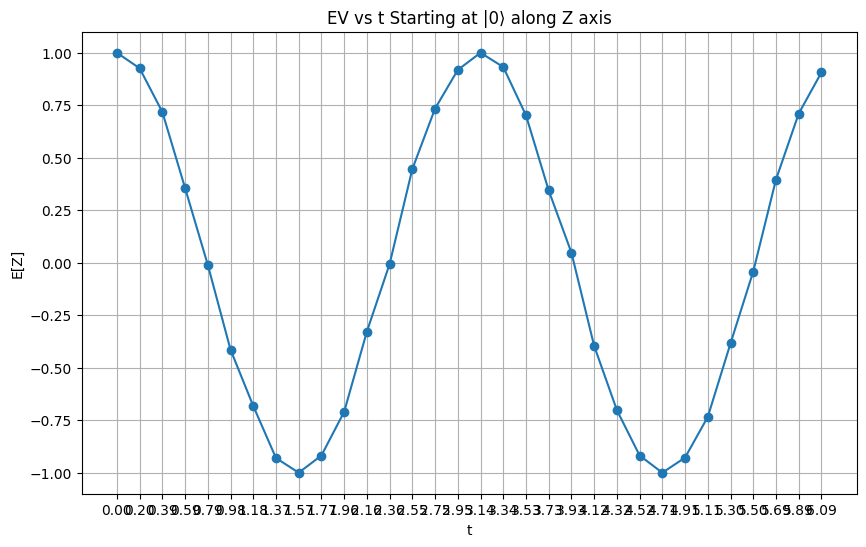

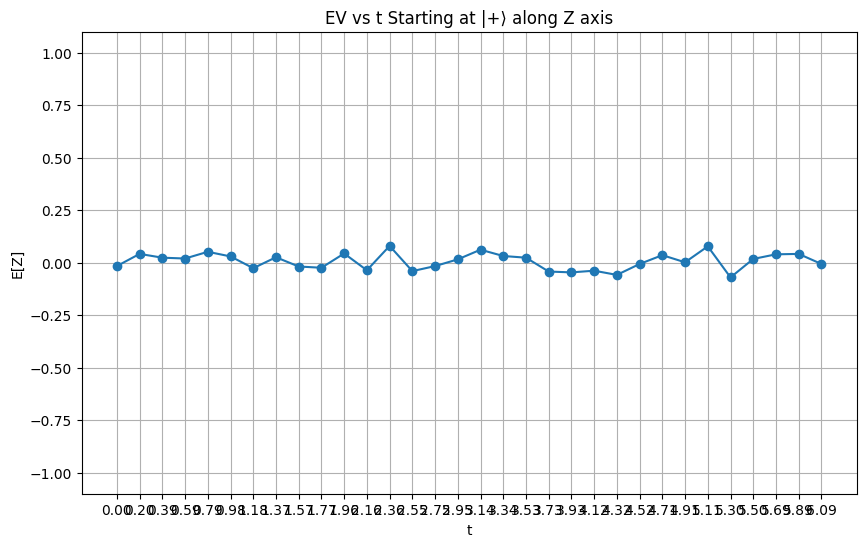

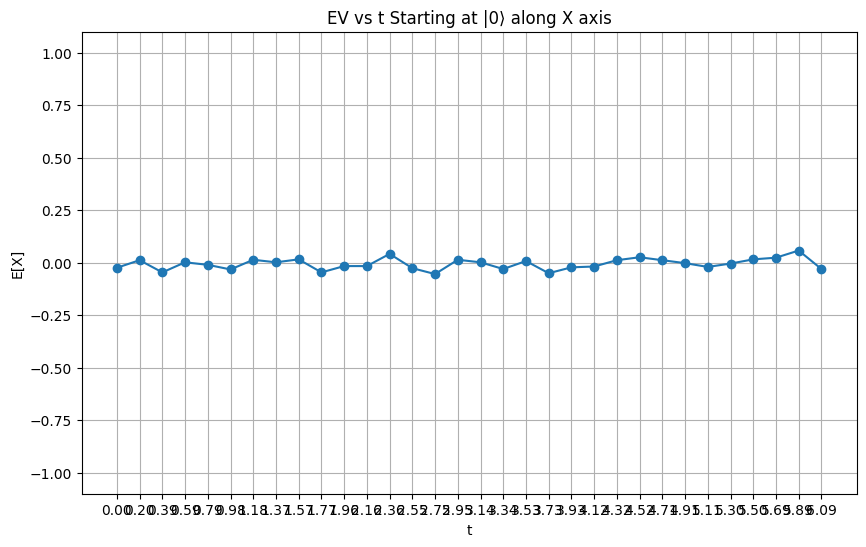

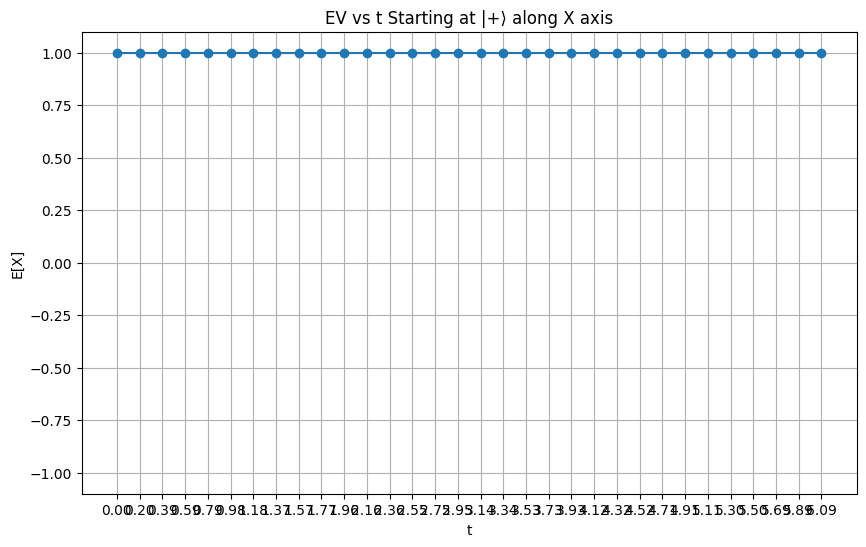

In [4]:
graph('0', 'z')
graph('+', 'z')
graph('0', 'x')
graph('+', 'x')

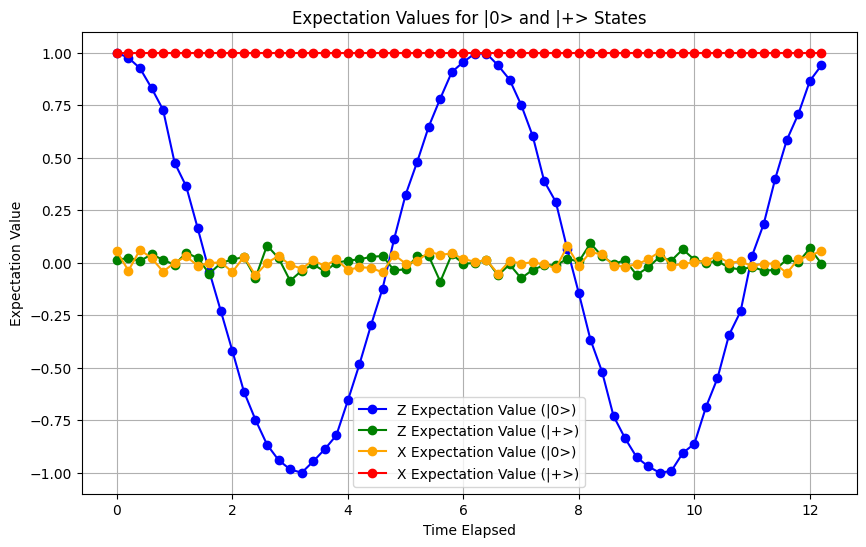

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import math as Math

qc = QuantumCircuit(1,1)

# Setting up Aer simulator
backend = Aer.get_backend('aer_simulator')

resolution = 0.2
# '0' means starting with |0>, '1' means starting with |+>
# First index is for Z expectation value, second index is for X expectation value
expectation_values = {
    '0': [[], []],
    '1': [[], []]
}
x_values = []
for i in range(int(Math.pi * 4 / resolution)):
    x_values.append(i * resolution)
    for key in expectation_values.keys():
        for j in range(2):
            # Write the circuit
            qc.clear()
            if key == '1':
                qc.h(0)
            qc.rx(resolution * i, 0)
            if j == 1:
                qc.h(0)
            qc.measure(0, 0)

            # Run the circuit
            job = backend.run(qc, shots=1000)
            result = job.result()
            counts = result.get_counts(qc)

            # Calculate expectation value
            expectation_value = (counts.get('0', 0) - counts.get('1', 0)) / 1000
            expectation_values[key][j].append(expectation_value)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(x_values, expectation_values['0'][0], label='Z Expectation Value (|0>)', color='blue', marker='o')
plt.plot(x_values, expectation_values['1'][0], label='Z Expectation Value (|+>)', color='green', marker='o')
plt.plot(x_values, expectation_values['0'][1], label='X Expectation Value (|0>)', color='orange', marker='o')
plt.plot(x_values, expectation_values['1'][1], label='X Expectation Value (|+>)', color='red', marker='o')
plt.title('Expectation Values for |0> and |+> States')
plt.xlabel('Time Elapsed')
plt.ylabel('Expectation Value')
plt.legend()
plt.grid()
plt.show()